## Neural Network- Tensorflow

Up until now we have only focused on Input values and the Output results. We know that we fit in some input values and later pass it to the model and then predict the test label and obtain prediction result.

Now we will dig deep into Neural Network and this is the beginning of Deep Learning...

### Load the Data
### Visulize the Data
### Normalize the Data
### Build the model
### Compile and Fit
### Prediction 


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [13]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import pandas as pd

data = pd.DataFrame(X_train[7])
pd.set_option('display.max_columns',28)

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0


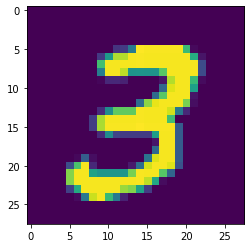

In [8]:
#Let us visualize it
plt.imshow(X_train[7])

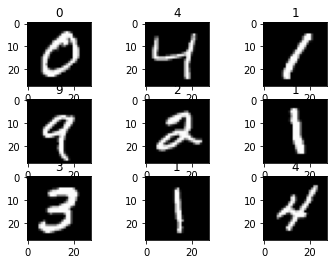

In [9]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(y_train[i])

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
data = pd.DataFrame(X_train[7])
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149020,0.168627,0.411765,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.682353,0.023529,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.168627,0.545098,0.878431,0.886275,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.619608,0.054902,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.698039,0.988235,0.988235,0.988235,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.231373,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.427451,0.988235,0.988235,0.901961,0.517647,0.521569,0.517647,0.517647,0.741176,0.988235,0.988235,0.988235,0.988235,0.231373,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.015686,0.113725,0.113725,0.094118,0.000000,0.000000,0.000000,0.000000,0.054902,0.886275,0.988235,0.988235,0.674510,0.027451,0.0,0.0,0.0,0.0,0.0


In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10,activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
784*64+64   #parameters = x*w+b = 784*64+64

50240

In [18]:
64*10+10

650

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [44]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9788 - val_loss: 0.0829 - val_accuracy: 0.9772
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9789 - val_loss: 0.0831 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9798 - val_loss: 0.0899 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9798 - val_loss: 0.0881 - val_accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0571 - accuracy: 0.9804 - val_loss: 0.0892 - val_accuracy: 0.9764


In [23]:
from keras.callbacks import Callback

class TerminateOnBaseline(Callback):
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,callbacks=[TerminateOnBaseline()])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9782


In [27]:
prediction = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [29]:
np.argmax(prediction[0])

7

In [30]:
y_test[0]

7

In [31]:
pred_labels = np.argmax(prediction,axis=1)

In [33]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(pred_labels,y_test)

In [35]:
import seaborn

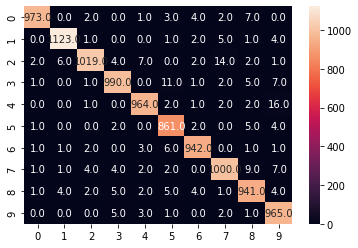

In [39]:
seaborn.heatmap(cm,annot=True,fmt='.1f')

In [45]:
trained_epochs = history.epoch
data = pd.DataFrame(history.history)

In [46]:
data

,loss,accuracy,val_loss,val_accuracy
0,0.063062,0.978767,0.082923,0.9772
1,0.063327,0.978900,0.083060,0.9772
2,0.059362,0.979767,0.089902,0.9761
3,0.060215,0.979833,0.088105,0.9780
4,0.057091,0.980367,0.089248,0.9764


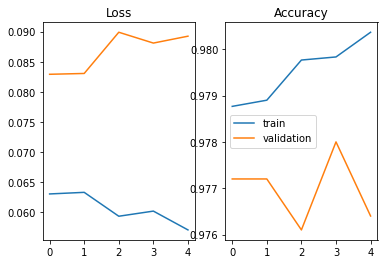

In [50]:
plt.subplot(1,2,1)
plt.plot(trained_epochs,data['loss'],label='train')
plt.plot(trained_epochs,data['val_loss'],label="validation")
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(trained_epochs,data['accuracy'],label="train")
plt.plot(trained_epochs,data['val_accuracy'],label="validation")
plt.title("Accuracy")
plt.legend()

# CNN - Intro

In [52]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32,3,input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10,activation="softmax")
])

In [53]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [54]:
cnn_history = cnn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1779 - accuracy: 0.9457 - val_loss: 0.0494 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0673 - accuracy: 0.9798 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0390 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0320 - val_accuracy: 0.9892


In [55]:
epochs = cnn_history.epoch
cnn_data = pd.DataFrame(cnn_history.history)

In [56]:
cnn_data

,loss,accuracy,val_loss,val_accuracy
0,0.177860,0.945683,0.049365,0.9849
1,0.067325,0.979800,0.037229,0.9881
2,0.050734,0.984367,0.038975,0.9866
3,0.039714,0.987950,0.034623,0.9888
4,0.033543,0.989083,0.031952,0.9892


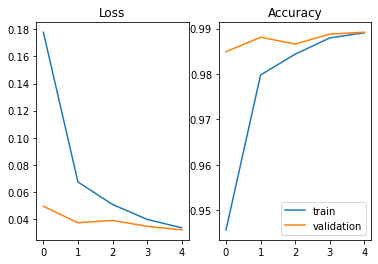

In [57]:
plt.subplot(1,2,1)
plt.plot(epochs,cnn_data['loss'],label='train')
plt.plot(epochs,cnn_data['val_loss'],label="validation")
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(epochs,cnn_data['accuracy'],label="train")
plt.plot(epochs,cnn_data['val_accuracy'],label="validation")
plt.title("Accuracy")
plt.legend()